# Исследовать клиентские данные, взятые из датасета (датасет см. в приложении 1, описание данных см. в приложении 2). Для этого следует:

In [2]:
import numpy as np
import pandas as pd

In [3]:
dt = pd.read_csv('bank_clients.csv')
dt_columns = dt.columns
dt.head()

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,0,Форма банка (без печати работодателя),Ремонт,1.0,0.59,мужской,0,среднее-специальное,менеджер высшего звена,< 50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2НДФЛ,Ремонт,1.0,0.55,мужской,0,высшее,специалист,>250,...,4.0,3.0,87.0,7.0,3.0,0.0,7.0,74.0,1.0,0.0
2,2,2НДФЛ,Ремонт,1.0,0.23,женский,1,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>=50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Свободная форма с печатью работодателя,Покупка земли,0.0,0.32,мужской,0,второе высшее,менеджер среднего звена,< 50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,высшее,специалист,>250,...,4.0,2.0,134.0,6.0,2.0,1.0,13.0,91.0,1.0,0.0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10242 non-null  int64  
 1   Income_base_type        10161 non-null  object 
 2   Credit_purpose          10242 non-null  object 
 3   Insurance_flag          10241 non-null  float64
 4   DTI                     10102 non-null  float64
 5   Sex                     10242 non-null  object 
 6   Full_age_child_number   10242 non-null  int64  
 7   Education               10242 non-null  object 
 8   Empl_type               10230 non-null  object 
 9   Empl_size               10104 non-null  object 
 10  Period_at_work          8008 non-null   float64
 11  age                     8008 non-null   float64
 12  Empl_property           8007 non-null   object 
 13  Empl_form               4011 non-null   object 
 14  Family_status           4010 non-null 

### Посчитать количество пропущенных и нулевых значений в полях, вывести доли в % от общего количества

In [5]:
dt.isna().sum()

Id                           0
Income_base_type            81
Credit_purpose               0
Insurance_flag               1
DTI                        140
Sex                          0
Full_age_child_number        0
Education                    0
Empl_type                   12
Empl_size                  138
Period_at_work            2234
age                       2234
Empl_property             2235
Empl_form                 6231
Family_status             6232
Max_90_days               6287
Avg_num_delay             6560
If_zalog                  6551
Num_account_active_180    6551
Active_to_all_prc         6551
Num_account_active_all    6551
Num_account_closed        6551
Sum_of_paym_months        6551
All_credits               6551
Active_not_cc             6551
Own_closed                6551
Min_mnth_after_loan       6551
Max_mnth_after_loan       6551
Dlq_exist                 6551
Ninety_vintage            6551
dtype: int64

In [6]:
round(dt.isna().sum()/len(dt['Id'])*100,1)

Id                         0.0
Income_base_type           0.8
Credit_purpose             0.0
Insurance_flag             0.0
DTI                        1.4
Sex                        0.0
Full_age_child_number      0.0
Education                  0.0
Empl_type                  0.1
Empl_size                  1.3
Period_at_work            21.8
age                       21.8
Empl_property             21.8
Empl_form                 60.8
Family_status             60.8
Max_90_days               61.4
Avg_num_delay             64.0
If_zalog                  64.0
Num_account_active_180    64.0
Active_to_all_prc         64.0
Num_account_active_all    64.0
Num_account_closed        64.0
Sum_of_paym_months        64.0
All_credits               64.0
Active_not_cc             64.0
Own_closed                64.0
Min_mnth_after_loan       64.0
Max_mnth_after_loan       64.0
Dlq_exist                 64.0
Ninety_vintage            64.0
dtype: float64

In [7]:
dt.nunique()

Id                        10242
Income_base_type              5
Credit_purpose               10
Insurance_flag                2
DTI                          58
Sex                           2
Full_age_child_number         6
Education                     9
Empl_type                     9
Empl_size                     8
Period_at_work              356
age                          41
Empl_property                12
Empl_form                     6
Family_status                 6
Max_90_days                  19
Avg_num_delay              1146
If_zalog                      2
Num_account_active_180        6
Active_to_all_prc            89
Num_account_active_all       14
Num_account_closed           22
Sum_of_paym_months          315
All_credits                  28
Active_not_cc                 9
Own_closed                    9
Min_mnth_after_loan          97
Max_mnth_after_loan         133
Dlq_exist                     2
Ninety_vintage                2
dtype: int64

### Проверить их на полноту данных по клиентам (посчитать количество пропущенных и нулевых значений по строкам, вывести доли в % от общего количества)

### Построить графики распределения данных по категориальным показателям

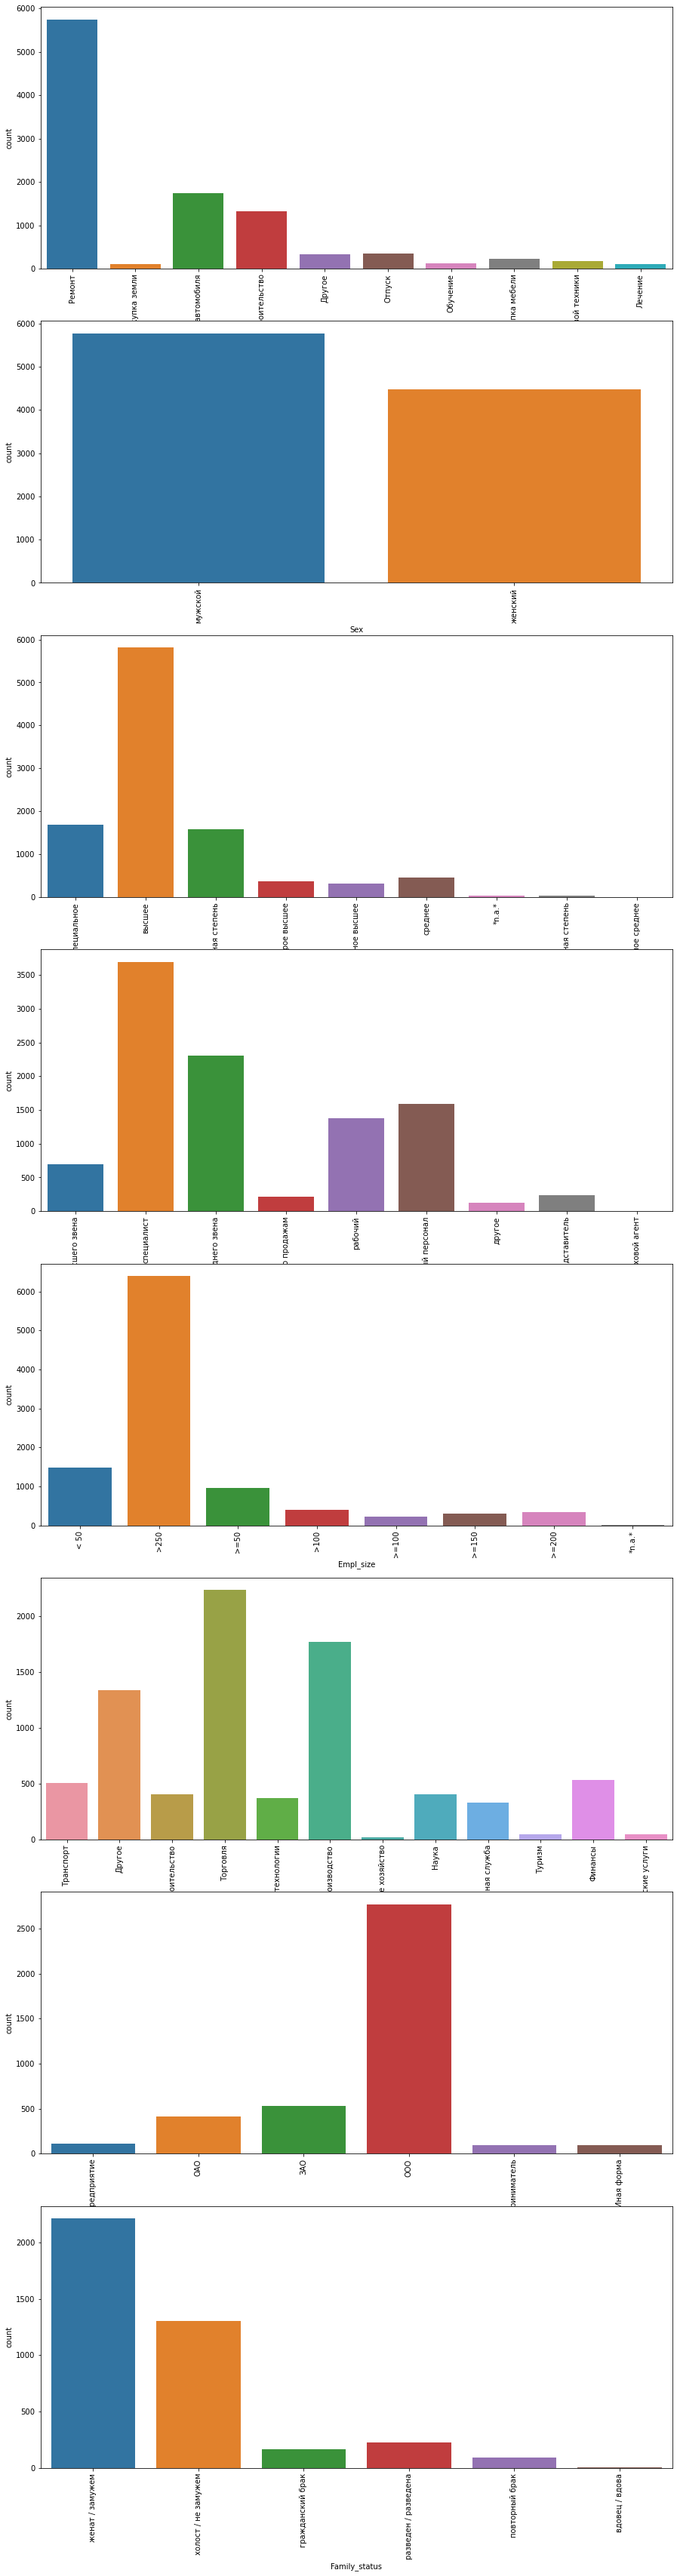

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categor = list(dt.columns[dt.dtypes=='object'])

fig,axes = plt.subplots(len(categor)-1,figsize=(15,60))
for i in range(1,len(categor)):
    sns.countplot(x=categor[i],data = dt,ax = axes[i-1])
    for tick in axes[i-1].get_xticklabels(): 
        tick.set_rotation(90) 

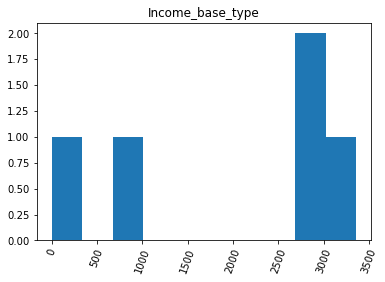

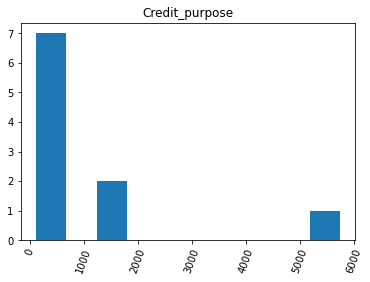

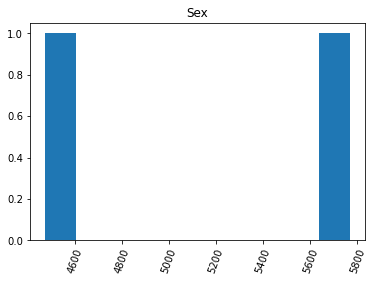

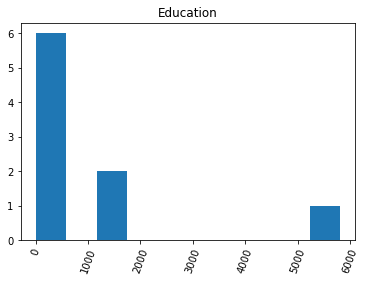

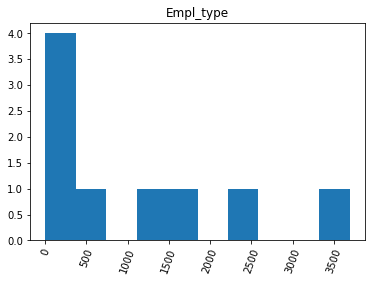

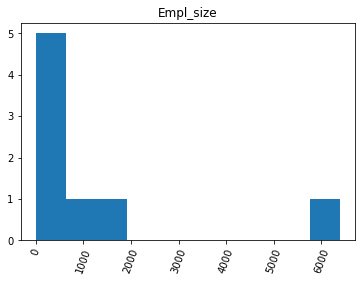

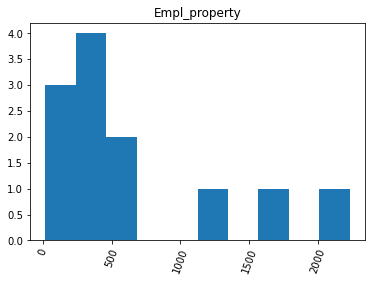

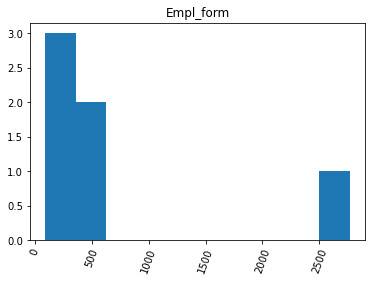

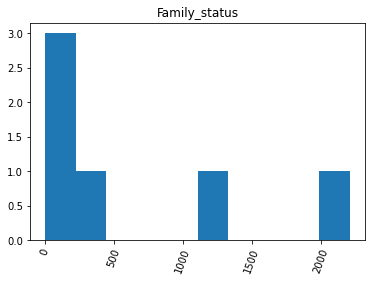

In [9]:
categories = list(dt.columns[dt.dtypes=='object'])
for category in categories:
    plt.hist(dt[category].value_counts())
    plt.xticks(rotation=70)
    plt.title(category)
    plt.show()

In [10]:
print("Доля просрочек более 90 дней:", round(len(dt[dt["Ninety_vintage"]!=0.0])/len(dt["Ninety_vintage"]), 2))

Доля просрочек более 90 дней: 0.65


# Подготовить итоговую витрину для сегментации данных. 

### Для этого следует исправить ошибки в данных

### Исключить клиентов с большим количеством пропусков 

In [11]:
# количество клиентов без единого пропуска
count = 0
for i in range(len(dt)):
    for j in dt.columns:
        if pd.isna(dt[j][i]):
            flag = False
            break
        else: 
            flag = True
    if flag == True:
        count += 1
print(count)

3677


Затем смотрим распределение пропущенных значений по клиентам, чтобы удалить наиболее пустые карточки

In [12]:
# количество пропусков у каждого клиента
clients_NaN = []
count = 0
for i in range(len(dt)):
    for j in dt.columns:
        count = 0
        if pd.isna(dt[j][i]):
            count += 1
    clients_NaN.append(count)

(array([3691.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6551.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

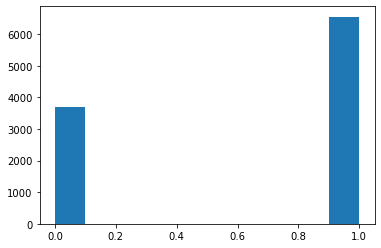

In [13]:
plt.hist(clients_NaN)

Нет клиентов, у которых пропусков было бы больше 1

### Восстановить пропущенные значения там, где это уместно

In [14]:
dt['Empl_form'].unique()

array([nan, 'Государственное предприятие', 'ОАО', 'ЗАО', 'ООО',
       'Индивидуальный предприниматель', 'Иная форма'], dtype=object)

Критериальные признаки заполняем по моде \
Числовые заполняем по среднему значению \
\
Два признака для примера заполнили отстраненной категорией

In [15]:
for clmn in dt.columns:
    if clmn == 'Empl_property':
        dt[clmn].fillna('Другое', inplace=True)
    elif clmn == 'Empl_form':
        dt[clmn].fillna('Иная форма', inplace=True)
    elif dt[clmn].dtype == 'float64':
        dt[clmn].fillna(dt[clmn].mean(), inplace=True)
    elif dt[clmn].dtype == 'O':  
        dt[clmn].fillna(dt[clmn].mode(), inplace=True)

In [16]:
dt.isna().sum(axis=0) # пропущенные значения

Id                           0
Income_base_type            81
Credit_purpose               0
Insurance_flag               0
DTI                          0
Sex                          0
Full_age_child_number        0
Education                    0
Empl_type                   12
Empl_size                  138
Period_at_work               0
age                          0
Empl_property                0
Empl_form                    0
Family_status             6231
Max_90_days                  0
Avg_num_delay                0
If_zalog                     0
Num_account_active_180       0
Active_to_all_prc            0
Num_account_active_all       0
Num_account_closed           0
Sum_of_paym_months           0
All_credits                  0
Active_not_cc                0
Own_closed                   0
Min_mnth_after_loan          0
Max_mnth_after_loan          0
Dlq_exist                    0
Ninety_vintage               0
dtype: int64

<AxesSubplot:>

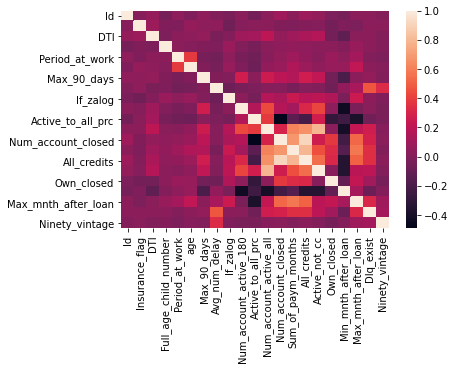

In [17]:
sns.heatmap(dt.corr())

### Проверить данные на наличие выбросов и удалить их по возможности

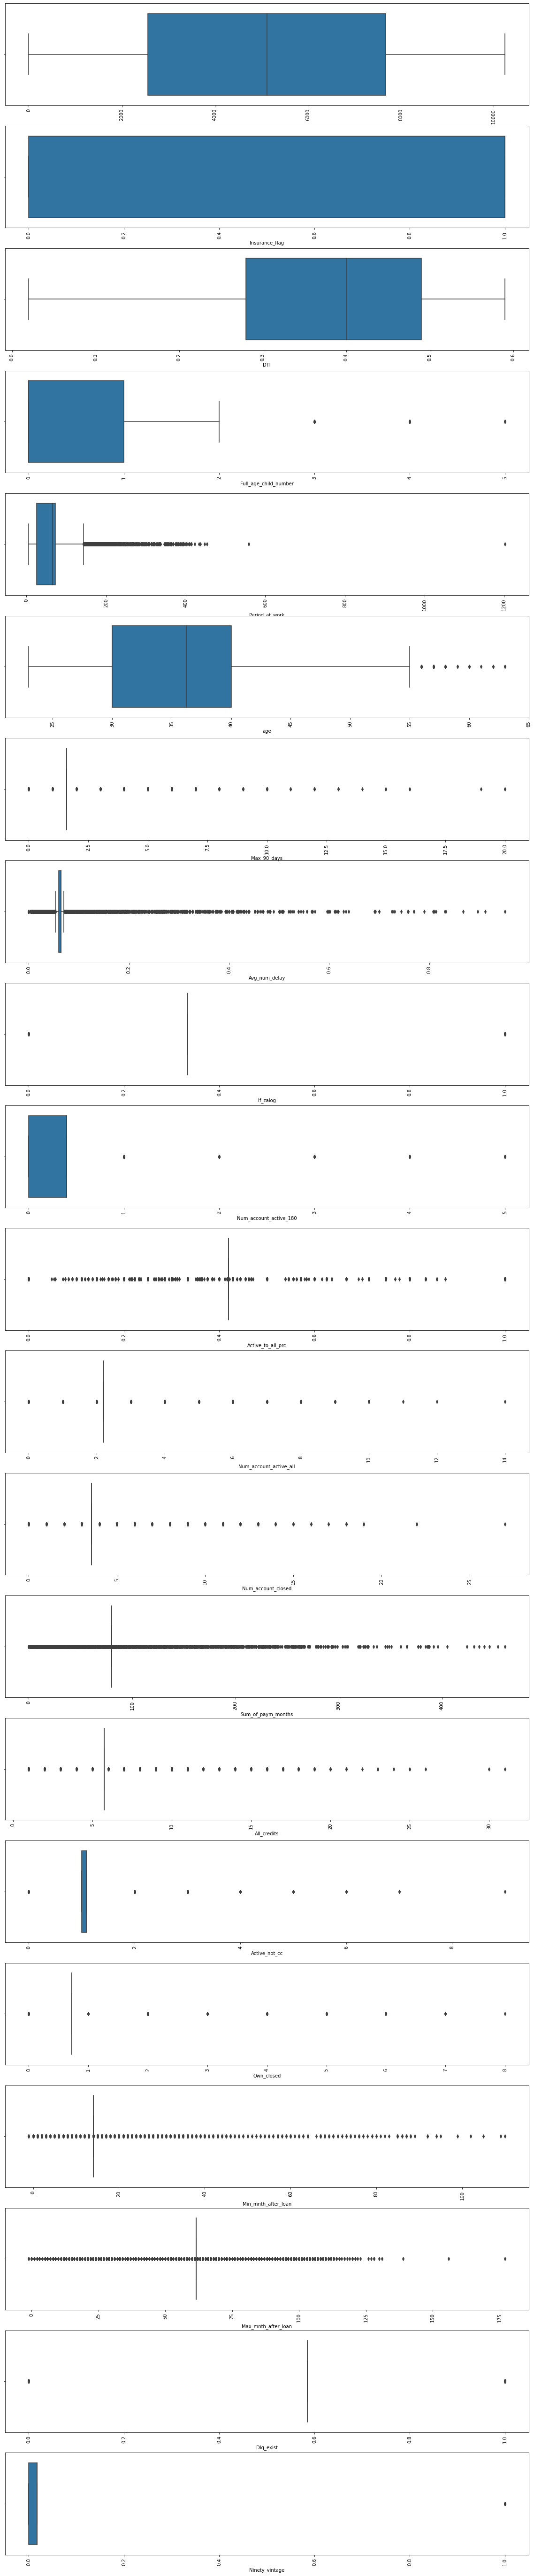

In [18]:
notcategor = list(dt.columns[dt.dtypes!='object'])

fig,axes = plt.subplots(len(notcategor),figsize=(20,100))
for i in range(0,len(notcategor)):
    sns.boxplot(x=notcategor[i],data = dt,ax = axes[i])
    for tick in axes[i].get_xticklabels(): 
        tick.set_rotation(90)

# Составить профили клиентов

Для этого следует провести сегментацию клиентов. Уместно ли здесь машинное обучение, и если да, то какие методы ты будешь использовать и почему? Проведи оптимизацию гипер параметров выбранной модели. Посмотри, как их изменение влияет на итоговую метрику accuracy.

## Кластеризация данных

### Подготовка данных

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
from sklearn.cluster import KMeans

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = LabelEncoder() # переводит текстовые значения в числовые

In [21]:
for col in categories:
    dt[col] = encoder.fit_transform(dt[[col]])

D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn import preprocessing

# Масштабирование
dt = preprocessing.normalize(dt)

In [23]:
from sklearn.impute import KNNImputer

# заполнение пропущенных значений с использованием k-ближайших соседей
imputer = KNNImputer(n_neighbors=5, weights="uniform")
dt = imputer.fit_transform(dt)

In [24]:
new_dt = dt.copy()
new_dt = pd.DataFrame(new_dt, columns = dt_columns)
new_dt.head()

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,0.000000,0.026195,0.058938,0.006549,0.003864,0.006549,0.000000,0.045841,0.013097,0.006549,...,0.014416,0.023274,0.526203,0.037690,0.007140,0.004737,0.092221,0.402686,0.003832,0.000115
1,0.007698,0.000000,0.069283,0.007698,0.004234,0.007698,0.000000,0.030792,0.046189,0.023094,...,0.030792,0.023094,0.669734,0.053887,0.023094,0.000000,0.053887,0.569659,0.007698,0.000000
2,0.015671,0.000000,0.070517,0.007835,0.001802,0.000000,0.007835,0.007835,0.031341,0.054847,...,0.017248,0.027847,0.629582,0.045095,0.008542,0.005668,0.110339,0.481798,0.004585,0.000138
3,0.022444,0.022444,0.044888,0.000000,0.002394,0.007481,0.000000,0.022444,0.029925,0.007481,...,0.016469,0.026589,0.601141,0.043058,0.008156,0.005412,0.105355,0.460033,0.004378,0.000132
4,0.020227,0.010114,0.045512,0.000000,0.001568,0.005057,0.010114,0.020227,0.030341,0.015171,...,0.020227,0.010114,0.677619,0.030341,0.010114,0.005057,0.065739,0.460174,0.005057,0.000000


### Оперделение количества класетров выборки

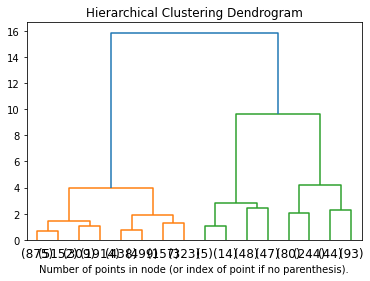

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = dt

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Определение количества кластеров с помощью метода локтя

In [26]:
wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(dt) 
    wcss.append(kmeans.inertia_)
wcss

[226.95887723938856,
 83.7194189097774,
 52.7490816692831,
 41.23617488414515,
 35.607509924449204,
 31.503539546393462,
 28.231377509788206,
 25.63434897814806,
 23.73182232941267,
 21.968998685426747]

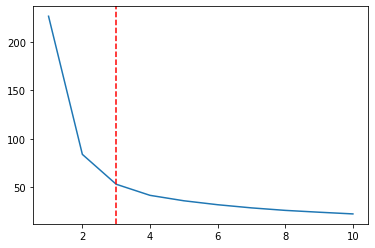

In [27]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(ks, wcss);
plt.axvline(3, linestyle='--', color='r')

Видно, что после выделения 3 кластеров ошибка снижается незначительно

In [28]:
link = linkage(new_dt, 'ward', 'euclidean')
new_dt['cluster'] = fcluster(link, 3, criterion='maxclust')
new_dt.groupby('cluster').mean()

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.998517,0.000630,0.002166,0.000182,0.000115,0.000170,0.000163,0.001254,0.001276,0.000986,...,0.000651,0.001018,0.023257,0.001669,0.000319,0.000215,0.004299,0.018030,0.000172,0.000005
2,0.370296,0.014978,0.050363,0.004462,0.002709,0.004363,0.003562,0.029344,0.029502,0.021461,...,0.015832,0.023353,0.551710,0.039185,0.007178,0.005278,0.089231,0.424973,0.004328,0.000068
3,0.897519,0.006589,0.021614,0.001761,0.001115,0.001730,0.001915,0.012219,0.012252,0.009695,...,0.006552,0.009972,0.234912,0.016524,0.003118,0.002102,0.044298,0.182849,0.001731,0.000055


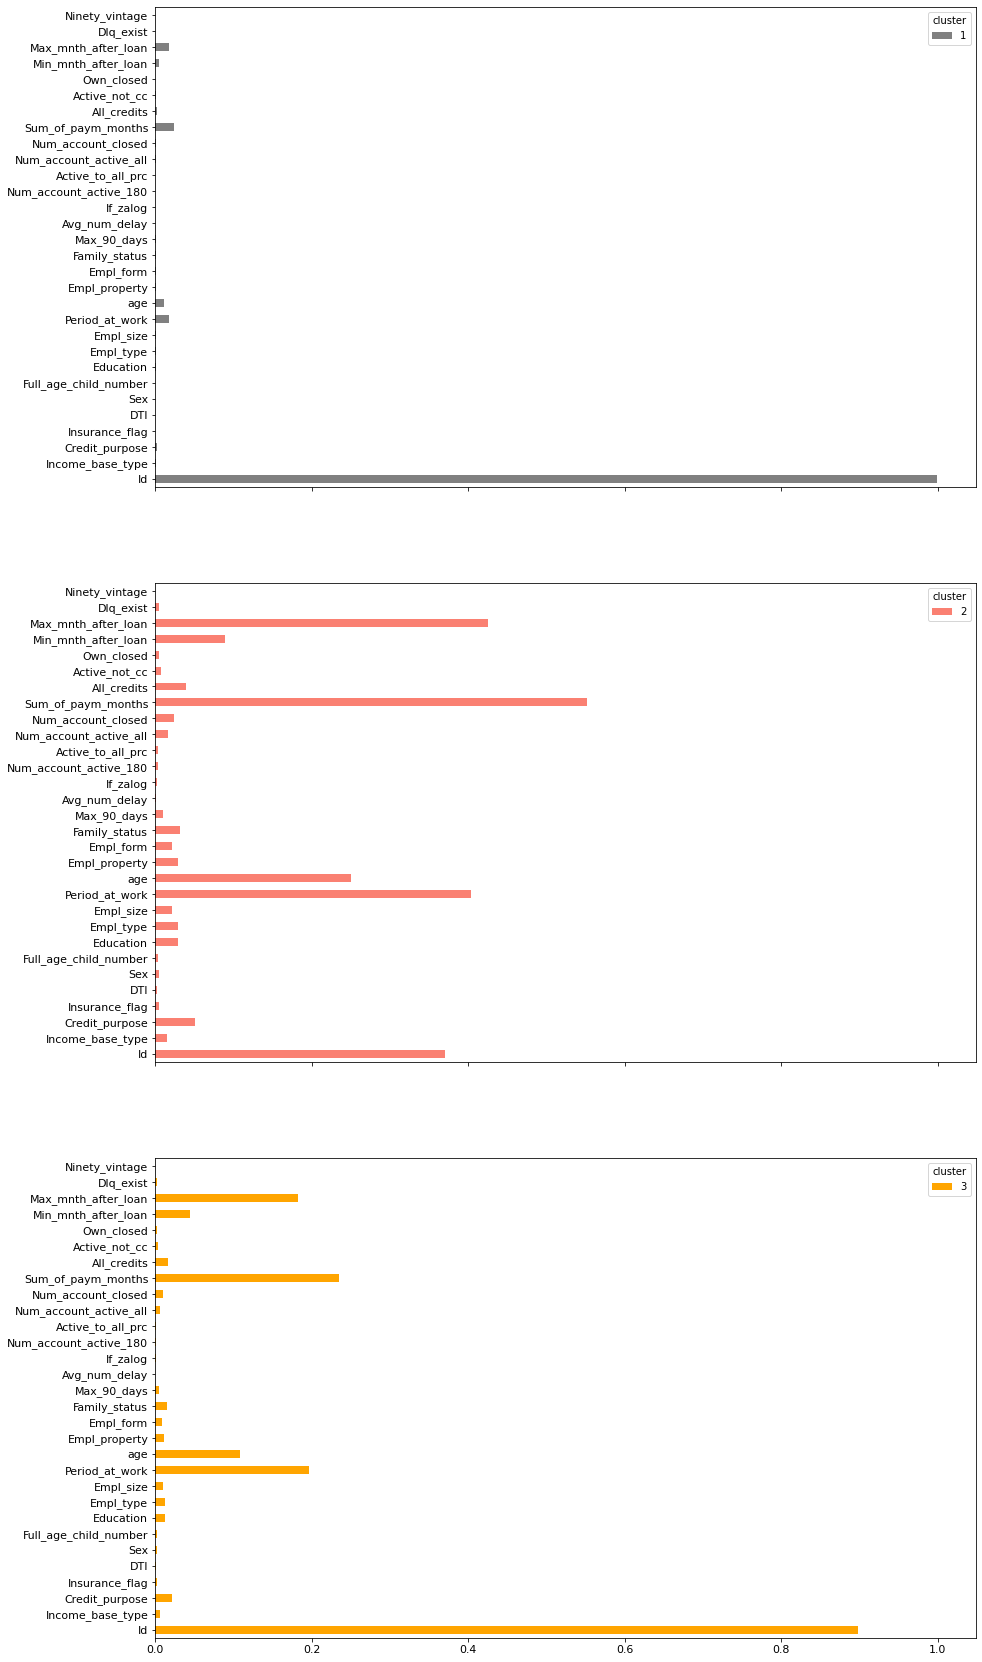

In [29]:
fig, axs = plt.subplots(nrows=3, sharex=True)
fig.set_size_inches(14.7, 30)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'salmon', 'orange']

for i in range(3):
    ax = axs[i]
    k += 1
    new_dt[new_dt.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
    ax.tick_params(labelsize = 11)

# Построение класетризации

In [30]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dt)
 
print(label)

[1 1 1 ... 0 0 0]


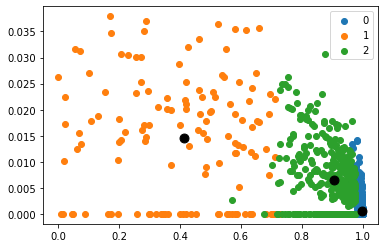

In [31]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dt[label == i , 0] , dt[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

Можно более подробно посмотреть на 1 кластер

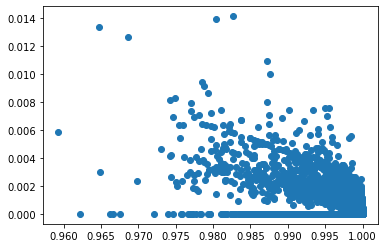

In [32]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = dt[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

### Оценка качества модели

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("silhouette_score:", silhouette_score(dt,  label))
print("calinski_harabasz_score:", calinski_harabasz_score(dt,  label))

silhouette_score: 0.8525862051145537
calinski_harabasz_score: 16908.174749794573


# Составление профилей клиентов 

### Декодировка данных

In [34]:
dt[label == 0].shape

(9675, 30)

In [35]:
tmp = pd.DataFrame(dt[label == 0])
print(tmp[0].shape)
index = [i for i in range(0,30)]
for column in index:
    tmp1[column] = encoder.inverse_transform(tmp[column])

(9675,)


ValueError: y contains previously unseen labels: [0.95927724 0.96215824 0.96468378 ... 0.99999319 0.99999458 0.99999507]

In [36]:
dt[label == 0][0]

array([0.96468378, 0.01339839, 0.01339839, 0.        , 0.00140683,
       0.00669919, 0.        , 0.02679677, 0.04019516, 0.02009758,
       0.11388628, 0.1875774 , 0.04689435, 0.03349596, 0.01339839,
       0.        , 0.        , 0.        , 0.        , 0.00669919,
       0.00669919, 0.        , 0.07369112, 0.00669919, 0.00669919,
       0.        , 0.06699193, 0.06699193, 0.        , 0.        ])

In [37]:
aa = encoder.inverse_transform(dt[label == 0][0].reshape(-1, 1))
aa

D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [0.00140683 0.00669919 0.01339839 0.02009758 0.02679677 0.03349596
 0.04019516 0.04689435 0.06699193 0.07369112 0.11388628 0.1875774
 0.96468378]

In [38]:
encoder.inverse_transform(dt[label == 0][i].reshape(-1, 1)).shape

ValueError: y contains previously unseen labels: [0.00181882 0.00422981 0.00845961 0.01268942 0.01691923 0.02114904
 0.02960865 0.06344711 0.07190672 0.14381344 0.16919229 0.96862585]

In [39]:
# for col in categories:
#     dt[col] = encoder.fit_transform(dt[[col]])
profile1 = pd.DataFrame()
i = 0
for column in dt_columns:
    profile1[column] = encoder.inverse_transform(dt[label == 0][i].reshape(-1, 1))
    i += 1

ValueError: y contains previously unseen labels: [0.00140683 0.00669919 0.01339839 0.02009758 0.02679677 0.03349596
 0.04019516 0.04689435 0.06699193 0.07369112 0.11388628 0.1875774
 0.96468378]

In [40]:
encoder.inverse_transform(dt[label == 0][0,1])

ValueError: y should be a 1d array, got an array of shape () instead.

In [41]:
profile1 = pd.DataFrame(dt[label == 0], columns = dt_columns)
profile1

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,0.964684,0.013398,0.013398,0.000000,0.001407,0.006699,0.000000,0.026797,0.040195,0.020098,...,0.006699,0.000000,0.073691,0.006699,0.006699,0.000000,0.066992,0.066992,0.000000,0.000000
1,0.974649,0.000000,0.014333,0.004778,0.001194,0.000000,0.000000,0.004778,0.019111,0.004778,...,0.000000,0.004778,0.009555,0.004778,0.000000,0.000000,0.057332,0.057332,0.000000,0.000000
2,0.968626,0.012689,0.016919,0.004230,0.001819,0.000000,0.004230,0.029609,0.000000,0.012689,...,0.008460,0.000000,0.071907,0.008460,0.008460,0.000000,0.004230,0.063447,0.000000,0.000000
3,0.962158,0.000000,0.037325,0.004147,0.001037,0.004147,0.008294,0.029031,0.000000,0.012442,...,0.004147,0.000000,0.029031,0.004147,0.004147,0.000000,0.024883,0.024883,0.000000,0.000000
4,0.987257,0.007994,0.027979,0.003997,0.001039,0.000000,0.000000,0.027979,0.000000,0.011991,...,0.003997,0.000000,0.011991,0.003997,0.003997,0.000000,0.043967,0.043967,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,0.999894,0.000195,0.000000,0.000000,0.000040,0.000098,0.000000,0.000098,0.000586,0.000293,...,0.000098,0.000391,0.005079,0.000488,0.000000,0.000000,0.002051,0.009572,0.000000,0.000000
9671,0.999967,0.000195,0.000879,0.000098,0.000055,0.000098,0.000000,0.000098,0.000586,0.000293,...,0.000293,0.000000,0.003809,0.000293,0.000098,0.000000,0.000586,0.003321,0.000000,0.000000
9672,0.999945,0.000000,0.000879,0.000000,0.000021,0.000098,0.000000,0.000391,0.000586,0.000293,...,0.000215,0.000347,0.007847,0.000562,0.000106,0.000071,0.001375,0.006005,0.000057,0.000002
9673,0.999922,0.000000,0.000879,0.000098,0.000048,0.000000,0.000000,0.000098,0.000195,0.000684,...,0.000215,0.000347,0.007846,0.000562,0.000106,0.000071,0.001375,0.006005,0.000057,0.000002


In [42]:
profile2 = pd.DataFrame(dt[label == 1], columns = dt_columns)
profile2

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,0.000000,0.026195,0.058938,0.006549,0.003864,0.006549,0.000000,0.045841,0.013097,0.006549,...,0.014416,0.023274,0.526203,0.037690,0.007140,0.004737,0.092221,0.402686,0.003832,0.000115
1,0.007698,0.000000,0.069283,0.007698,0.004234,0.007698,0.000000,0.030792,0.046189,0.023094,...,0.030792,0.023094,0.669734,0.053887,0.023094,0.000000,0.053887,0.569659,0.007698,0.000000
2,0.015671,0.000000,0.070517,0.007835,0.001802,0.000000,0.007835,0.007835,0.031341,0.054847,...,0.017248,0.027847,0.629582,0.045095,0.008542,0.005668,0.110339,0.481798,0.004585,0.000138
3,0.022444,0.022444,0.044888,0.000000,0.002394,0.007481,0.000000,0.022444,0.029925,0.007481,...,0.016469,0.026589,0.601141,0.043058,0.008156,0.005412,0.105355,0.460033,0.004378,0.000132
4,0.020227,0.010114,0.045512,0.000000,0.001568,0.005057,0.010114,0.020227,0.030341,0.015171,...,0.020227,0.010114,0.677619,0.030341,0.010114,0.005057,0.065739,0.460174,0.005057,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.716381,0.000000,0.014925,0.003731,0.002201,0.003731,0.000000,0.014925,0.007462,0.003731,...,0.007462,0.018656,0.339535,0.026118,0.003731,0.000000,0.085816,0.346997,0.003731,0.000000
129,0.582745,0.011597,0.026093,0.002899,0.001102,0.000000,0.000000,0.002899,0.017395,0.002899,...,0.008698,0.020295,0.600141,0.028992,0.005798,0.005798,0.020295,0.275427,0.002899,0.000000
130,0.634361,0.011857,0.026679,0.002964,0.000474,0.002964,0.002964,0.011857,0.005929,0.002964,...,0.008893,0.020750,0.690683,0.029643,0.000000,0.008893,0.038536,0.284573,0.002964,0.000000
131,0.529763,0.009810,0.022073,0.000000,0.001398,0.002453,0.007358,0.002453,0.000000,0.002453,...,0.022073,0.017168,0.787286,0.039242,0.009810,0.002453,0.000000,0.250166,0.002453,0.000000


In [43]:
profile3 = pd.DataFrame(dt[label == 2], columns = dt_columns)
profile3

,Id,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,0.745771,0.024859,0.111866,0.012430,0.007333,0.000000,0.000000,0.049718,0.049718,0.037289,...,0.024859,0.012430,0.136725,0.037289,0.012430,0.000000,0.012430,0.124295,0.000000,0.000000
1,0.754474,0.000000,0.034294,0.000000,0.003858,0.008574,0.000000,0.034294,0.051441,0.025721,...,0.008574,0.017147,0.248634,0.025721,0.000000,0.000000,0.180045,0.325796,0.000000,0.000000
2,0.723698,0.000000,0.027309,0.006827,0.003482,0.006827,0.000000,0.027309,0.054619,0.020482,...,0.020482,0.027309,0.348194,0.047791,0.006827,0.000000,0.027309,0.539360,0.006827,0.000000
3,0.919044,0.017019,0.076587,0.000000,0.003404,0.000000,0.008510,0.034039,0.051058,0.025529,...,0.008510,0.008510,0.085097,0.017019,0.008510,0.008510,0.017019,0.110626,0.000000,0.000000
4,0.915104,0.016488,0.024733,0.008244,0.003050,0.000000,0.000000,0.032977,0.032977,0.024733,...,0.008244,0.000000,0.082442,0.008244,0.000000,0.000000,0.074198,0.074198,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,0.950663,0.003094,0.006962,0.000774,0.000456,0.000000,0.001547,0.000774,0.001547,0.000774,...,0.007735,0.005415,0.300128,0.013150,0.003868,0.000000,0.000774,0.070391,0.000774,0.000000
430,0.951703,0.001441,0.002882,0.000720,0.000245,0.000720,0.000000,0.002882,0.003602,0.002161,...,0.000000,0.001441,0.027377,0.001441,0.000000,0.000000,0.048270,0.049710,0.000720,0.000000
431,0.973564,0.002882,0.006486,0.000721,0.000425,0.000000,0.000000,0.005044,0.002882,0.000721,...,0.005765,0.007927,0.196010,0.013692,0.002162,0.000000,0.003603,0.087196,0.000721,0.000000
432,0.948919,0.000000,0.006135,0.000682,0.000239,0.000000,0.000682,0.004772,0.003408,0.002045,...,0.001501,0.002423,0.054776,0.003923,0.000743,0.000493,0.009600,0.041918,0.000399,0.000012
